# Problem Statement
### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
### 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.
### In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
### They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands
### Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:
### You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.  

# Import Necessary  Libraries

In [1]:
import numpy as np
import pandas as pd
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
bike = pd.read_csv("day.csv", parse_dates=['dteday'])

In [4]:
# Checking the top 5 rows of the dataframe
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
bike.shape

(730, 16)

In [6]:
bike.size

11680

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [9]:
bike.drop_duplicates(subset=None, inplace=True)
bike.shape

(730, 16)

## Removing Redundant columns

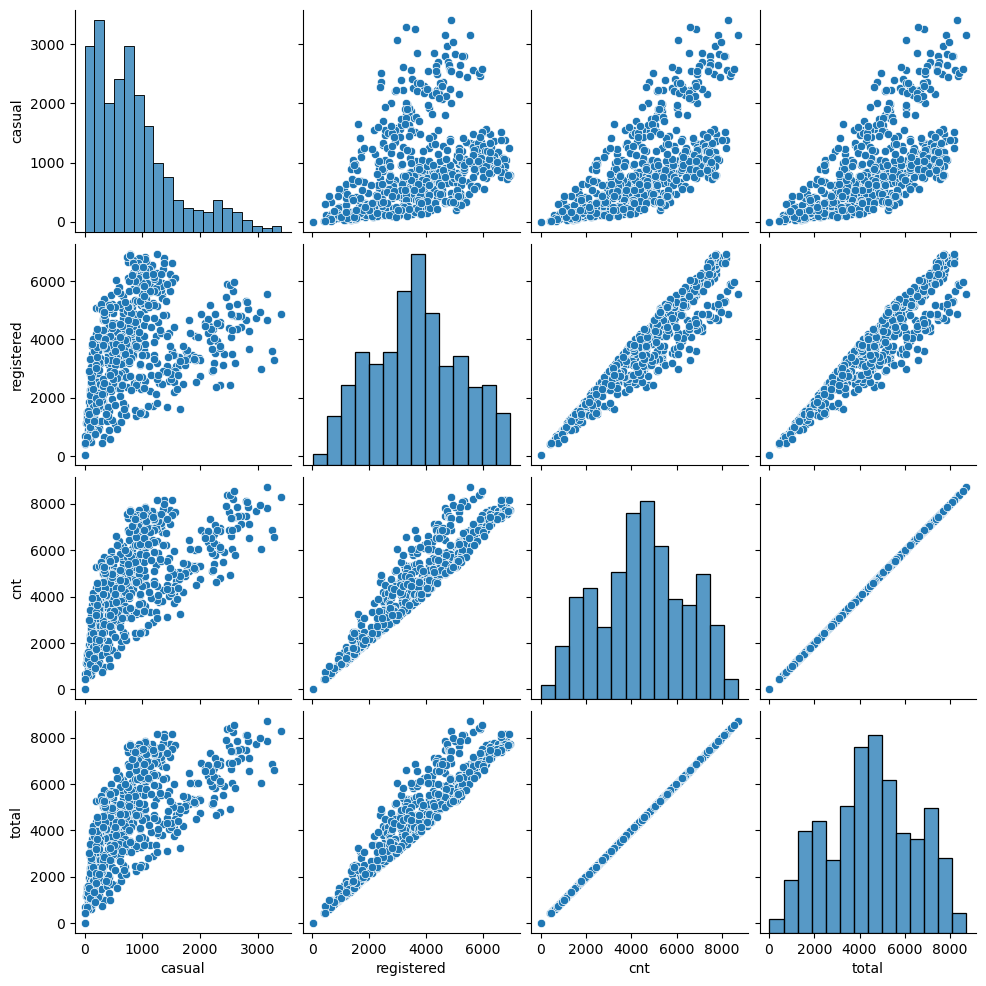

In [10]:
# Checking the relationship between casual, registered and cnt column
bike_cnt = bike[['casual','registered','cnt']]

bike_cnt['total'] = bike_cnt['casual'] + bike_cnt ['registered']
sns.pairplot(bike_cnt)
plt.show()

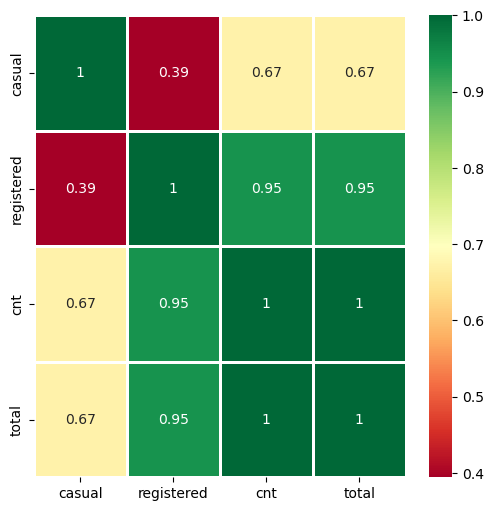

In [11]:
# also checking the correlation of the variables 
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_cnt.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [12]:
#dropping the unwanted columns
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)


In [13]:
bike.shape

(730, 12)

## Encoding & Visualizing the data

In [14]:
#Converting season
bike.season.replace((1,2,3,4), ('W1_Spring','W2_Summer','W3_Fall','W4_Winter'), inplace=True)
bike.season.value_counts(normalize=True)

season
W3_Fall      0.257534
W2_Summer    0.252055
W1_Spring    0.246575
W4_Winter    0.243836
Name: proportion, dtype: float64

In [15]:
#Converting mnth
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.mnth.value_counts(normalize=True)

mnth
Jan    0.084932
Mar    0.084932
May    0.084932
Jul    0.084932
Aug    0.084932
Oct    0.084932
Dec    0.084932
Apr    0.082192
Jun    0.082192
Sep    0.082192
Nov    0.082192
Feb    0.076712
Name: proportion, dtype: float64

In [16]:
#Converting weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts(normalize=True)

weathersit
Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: proportion, dtype: float64

In [17]:
#Converting weathersit
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)

weekday
Monday       0.143836
Tuesday      0.143836
Wednesday    0.142466
Thursday     0.142466
Friday       0.142466
Saturday     0.142466
Sunday       0.142466
Name: proportion, dtype: float64

## Visualising Categorical Variables

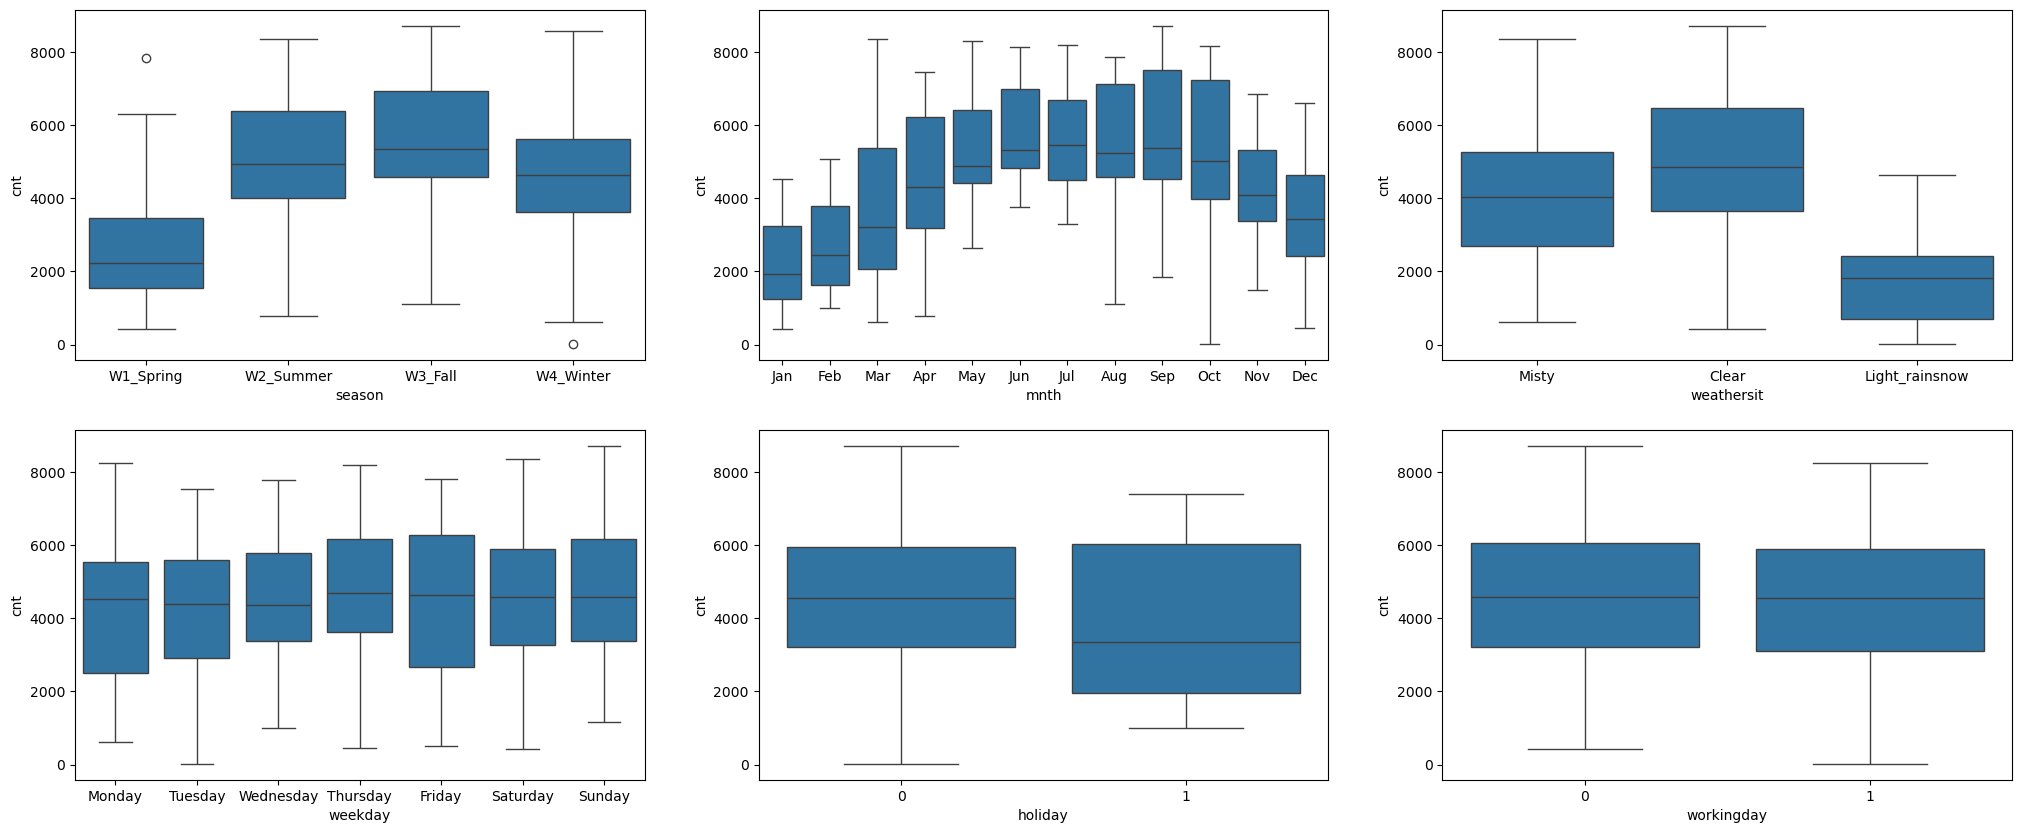

In [18]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

In [19]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = bike.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
    return round(cat_df,2)

In [20]:
# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bike, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

### season:

In [21]:
categorical_stats('season')

sum     mean  count  sum_perc  count_perc
season                                                  
W3_Fall    1061129  5644.30    188     32.24       25.75
W2_Summer   918589  4992.33    184     27.91       25.21
W4_Winter   841613  4728.16    178     25.57       24.38
W1_Spring   469514  2608.41    180     14.27       24.66

In [22]:
def categorical_plot(col, x, y):
    plt.figure(figsize=(x, y))
    
    # First subplot
    plt.subplot(1, 2, 1)
    sns.barplot(x=col, y='cnt', data=bike)
    
    plt.show()

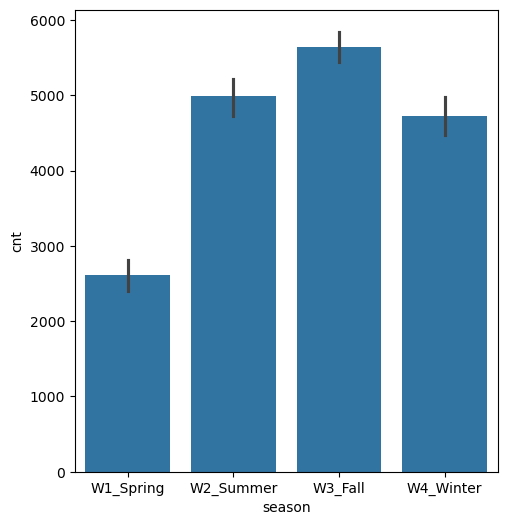

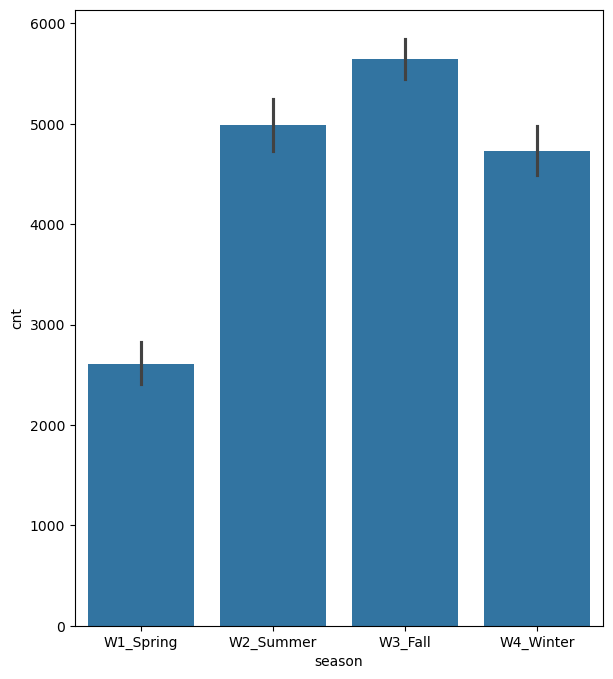

In [23]:
# Call the function with your specific parameters
categorical_plot('season', 12, 6)

# Additional custom plotting outside of the function
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='season', y='cnt', data=bike)

plt.show()

### month

In [24]:
categorical_stats('mnth')

sum     mean  count  sum_perc  count_perc
mnth                                              
Aug   351194  5664.42     62     10.67        8.49
Jun   346342  5772.37     60     10.52        8.22
Sep   345991  5766.52     60     10.51        8.22
Jul   344948  5563.68     62     10.48        8.49
May   331686  5349.77     62     10.08        8.49
Oct   322352  5199.23     62      9.80        8.49
Apr   269094  4484.90     60      8.18        8.22
Nov   254831  4247.18     60      7.74        8.22
Mar   228920  3692.26     62      6.96        8.49
Dec   211036  3403.81     62      6.41        8.49
Feb   149518  2669.96     56      4.54        7.67
Jan   134933  2176.34     62      4.10        8.49

###  Weather:

In [25]:
categorical_stats('weathersit')

sum     mean  count  sum_perc  count_perc
weathersit                                                   
Clear           2257952  4876.79    463     68.61       63.42
Misty            995024  4044.81    246     30.24       33.70
Light_rainsnow    37869  1803.29     21      1.15        2.88

### Weekday :

In [26]:
categorical_stats('weekday')

sum     mean  count  sum_perc  count_perc
weekday                                                
Thursday   487923  4691.57    104     14.83       14.25
Sunday     485235  4665.72    104     14.74       14.25
Saturday   481176  4626.69    104     14.62       14.25
Friday     478132  4597.42    104     14.53       14.25
Wednesday  462276  4444.96    104     14.05       14.25
Tuesday    448822  4274.50    105     13.64       14.38
Monday     447281  4259.82    105     13.59       14.38

### Holiday 

In [27]:
categorical_stats('holiday')

sum    mean  count  sum_perc  count_perc
holiday                                              
0        3212410  4530.9    709     97.62       97.12
1          78435  3735.0     21      2.38        2.88

### Working Day

In [28]:
categorical_stats('workingday')

sum     mean  count  sum_perc  count_perc
workingday                                               
1           2253988  4472.20    504     68.49       69.04
0           1036857  4587.86    226     31.51       30.96

### Year

In [29]:
categorical_stats('yr')

sum     mean  count  sum_perc  count_perc
yr                                               
1   2047742  5610.25    365     62.23        50.0
0   1243103  3405.76    365     37.77        50.0

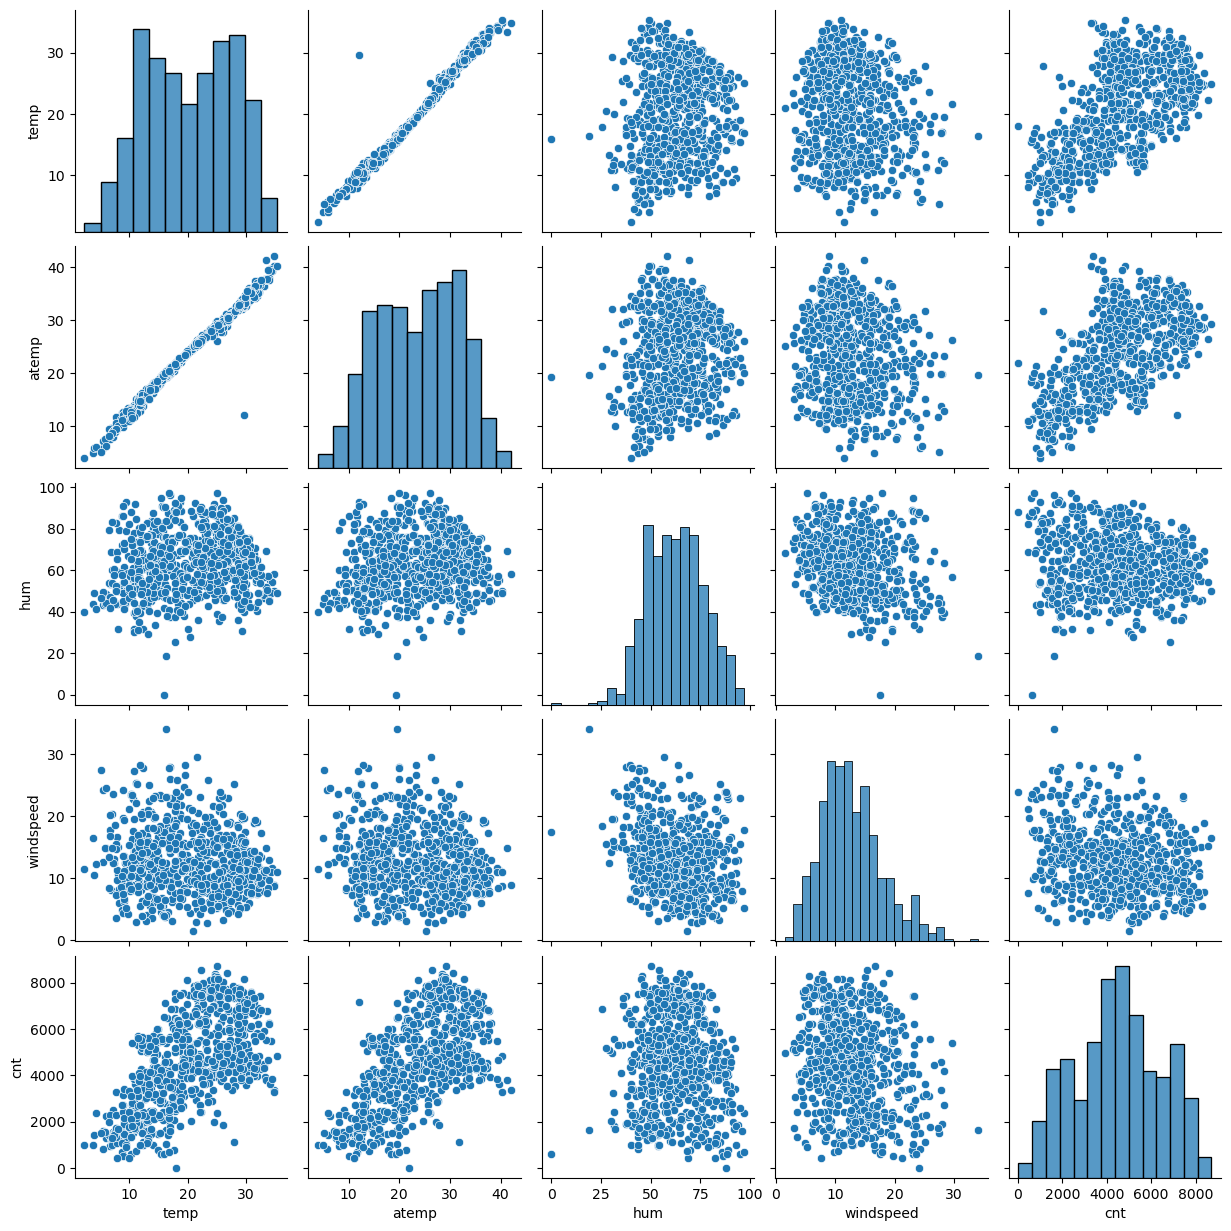

In [30]:
bike_num = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()



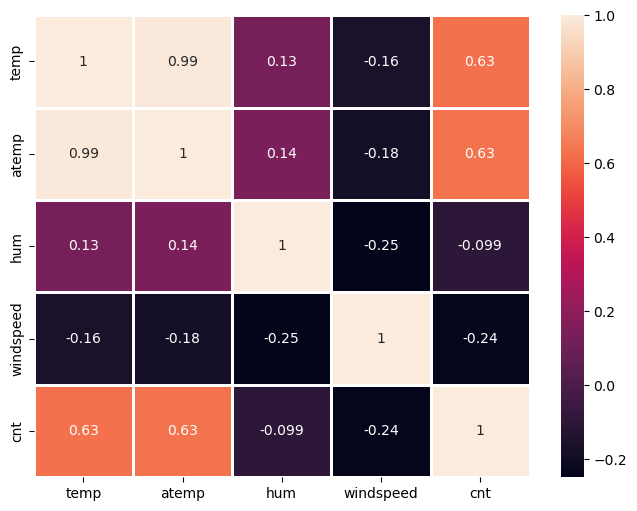

In [31]:
plt.figure(figsize = (8,6))
ax= sns.heatmap(bike_num.corr(), annot = True,linewidth =1)

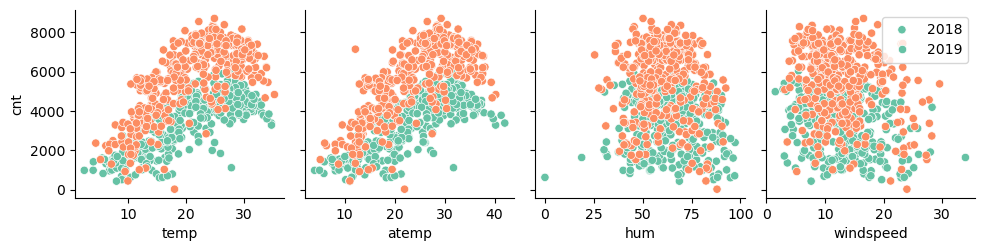

In [32]:
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike, hue='yr', palette='Set2')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

## Dummy Variable Creation

In [33]:
# creating dummy variable for Season
season = pd.get_dummies(bike['season'], drop_first = True)
season.head()

W2_Summer  W3_Fall  W4_Winter
0      False    False      False
1      False    False      False
2      False    False      False
3      False    False      False
4      False    False      False

In [34]:
# creating dummy variable for weather
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head()

Light_rainsnow  Misty
0           False   True
1           False   True
2           False  False
3           False  False
4           False  False

In [35]:
# creating dummy variable for month
month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head()

Aug    Dec    Feb   Jan    Jul    Jun    Mar    May    Nov    Oct    Sep
0  False  False  False  True  False  False  False  False  False  False  False
1  False  False  False  True  False  False  False  False  False  False  False
2  False  False  False  True  False  False  False  False  False  False  False
3  False  False  False  True  False  False  False  False  False  False  False
4  False  False  False  True  False  False  False  False  False  False  False

In [36]:
# creating dummy variable for weekdays
weekday = pd.get_dummies(bike['weekday'], drop_first = True)
weekday.head()

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0    True     False   False     False    False      False
1   False     False   False     False     True      False
2   False     False   False     False    False       True
3   False     False   False      True    False      False
4   False     False   False     False    False      False

## Merging the Dataframes

In [37]:
bike_new = pd.concat([bike,season,month,weather,weekday], axis = 1)
bike_new.head()

season  yr mnth  holiday    weekday  workingday weathersit       temp  \
0  W1_Spring   0  Jan        0     Monday           1      Misty  14.110847   
1  W1_Spring   0  Jan        0    Tuesday           1      Misty  14.902598   
2  W1_Spring   0  Jan        0  Wednesday           1      Clear   8.050924   
3  W1_Spring   0  Jan        0   Thursday           1      Clear   8.200000   
4  W1_Spring   0  Jan        0     Friday           1      Clear   9.305237   

      atemp      hum  ...    Oct    Sep  Light_rainsnow  Misty  Monday  \
0  18.18125  80.5833  ...  False  False           False   True    True   
1  17.68695  69.6087  ...  False  False           False   True   False   
2   9.47025  43.7273  ...  False  False           False  False   False   
3  10.60610  59.0435  ...  False  False           False  False   False   
4  11.46350  43.6957  ...  False  False           False  False   False   

   Saturday  Sunday  Thursday  Tuesday  Wednesday  
0     False   False     False    False      False  
1     False   False     False     True      False  
2     False   False     False    False       True  
3     False   False      True    False      False  
4     False   False     False    False      False  

[5 rows x 34 columns]

In [38]:
bike_new.shape

(730, 34)

In [39]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  W2_Summer       730 non-null    bool   
 13  W3_Fall         730 non-null    bool   
 14  W4_Winter       730 non-null    bool   
 15  Aug             730 non-null    bool   
 16  Dec             730 non-null    bool   
 17  Feb             730 non-null    boo

## Splitting the data into Train & Test Dataset

In [40]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 333)

In [41]:
bike_train.shape

(510, 34)

In [42]:
bike_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.501961    0.023529    0.690196   20.218078   23.590696   62.340743   
std      0.500487    0.151726    0.462867    7.500110    8.138271   14.418728   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.717923   16.744800   51.604150   
50%      1.000000    0.000000    1.000000   20.209597   23.973425   62.233700   
75%      1.000000    0.000000    1.000000   26.786653   30.327088   72.958300   
max      1.000000    1.000000    1.000000   35.328347   42.044800   96.250000   

        windspeed          cnt  
count  510.000000   510.000000  
mean    12.771365  4494.103922  
std      5.205888  1948.315655  
min      1.500244    22.000000  
25%      9.011098  3146.500000  
50%     12.125057  4508.000000  
75%     15.624869  5962.750000  
max     34.000021  8714.000000

In [43]:
bike_test.shape

(220, 34)

In [44]:
bike_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.495455    0.040909    0.690909   20.553817   24.040727   63.749086   
std      0.501120    0.198531    0.463173    7.533926    8.188064   13.790510   
min      0.000000    0.000000    0.000000    3.957390    4.941955   29.000000   
25%      0.000000    0.000000    0.000000   14.189577   17.366525   53.260450   
50%      0.000000    0.000000    1.000000   20.756250   24.762725   63.687500   
75%      1.000000    0.000000    1.000000   27.119778   30.903325   73.333350   
max      1.000000    1.000000    1.000000   34.815847   41.318550   97.250000   

        windspeed          cnt  
count  220.000000   220.000000  
mean    12.745665  4540.236364  
std      5.184271  1911.199159  
min      3.875669   506.000000  
25%      9.041851  3193.000000  
50%     12.146128  4593.500000  
75%     15.643227  5959.750000  
max     28.292425  8395.000000

### scaling the data frame

In [45]:
scaler = MinMaxScaler()
bike_train.head()

season  yr mnth  holiday    weekday  workingday weathersit       temp  \
650  W4_Winter   1  Oct        0     Sunday           0      Clear  16.126653   
212    W3_Fall   0  Aug        0  Wednesday           1      Clear  31.638347   
714  W4_Winter   1  Dec        0     Monday           1      Misty  14.862500   
8    W1_Spring   0  Jan        0    Tuesday           1      Clear   5.671653   
502  W2_Summer   1  May        0   Saturday           0      Clear  23.130847   

        atemp      hum  ...    Oct    Sep  Light_rainsnow  Misty  Monday  \
650  19.56980  49.4583  ...   True  False           False  False   False   
212  35.16460  55.0833  ...  False  False           False  False   False   
714  18.49690  83.8750  ...  False  False           False   True    True   
8     5.80875  43.4167  ...  False  False           False  False   False   
502  27.55605  52.3333  ...  False  False           False  False   False   

     Saturday  Sunday  Thursday  Tuesday  Wednesday  
650     False    True     False    False      False  
212     False   False     False    False       True  
714     False   False     False    False      False  
8       False   False     False     True      False  
502      True   False     False    False      False  

[5 rows x 34 columns]

In [46]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

season  yr mnth  holiday    weekday  workingday weathersit      temp  \
650  W4_Winter   1  Oct        0     Sunday           0      Clear  0.416433   
212    W3_Fall   0  Aug        0  Wednesday           1      Clear  0.887856   
714  W4_Winter   1  Dec        0     Monday           1      Misty  0.378013   
8    W1_Spring   0  Jan        0    Tuesday           1      Clear  0.098690   
502  W2_Summer   1  May        0   Saturday           0      Clear  0.629300   

        atemp       hum  ...    Oct    Sep  Light_rainsnow  Misty  Monday  \
650  0.409971  0.513852  ...   True  False           False  False   False   
212  0.819376  0.572294  ...  False  False           False  False   False   
714  0.381804  0.871429  ...  False  False           False   True    True   
8    0.048706  0.451083  ...  False  False           False  False   False   
502  0.619631  0.543723  ...  False  False           False  False   False   

     Saturday  Sunday  Thursday  Tuesday  Wednesday  
650     False    True     False    False      False  
212     False   False     False    False       True  
714     False   False     False    False      False  
8       False   False     False     True      False  
502      True   False     False    False      False  

[5 rows x 34 columns]

### Correlation Coefficient

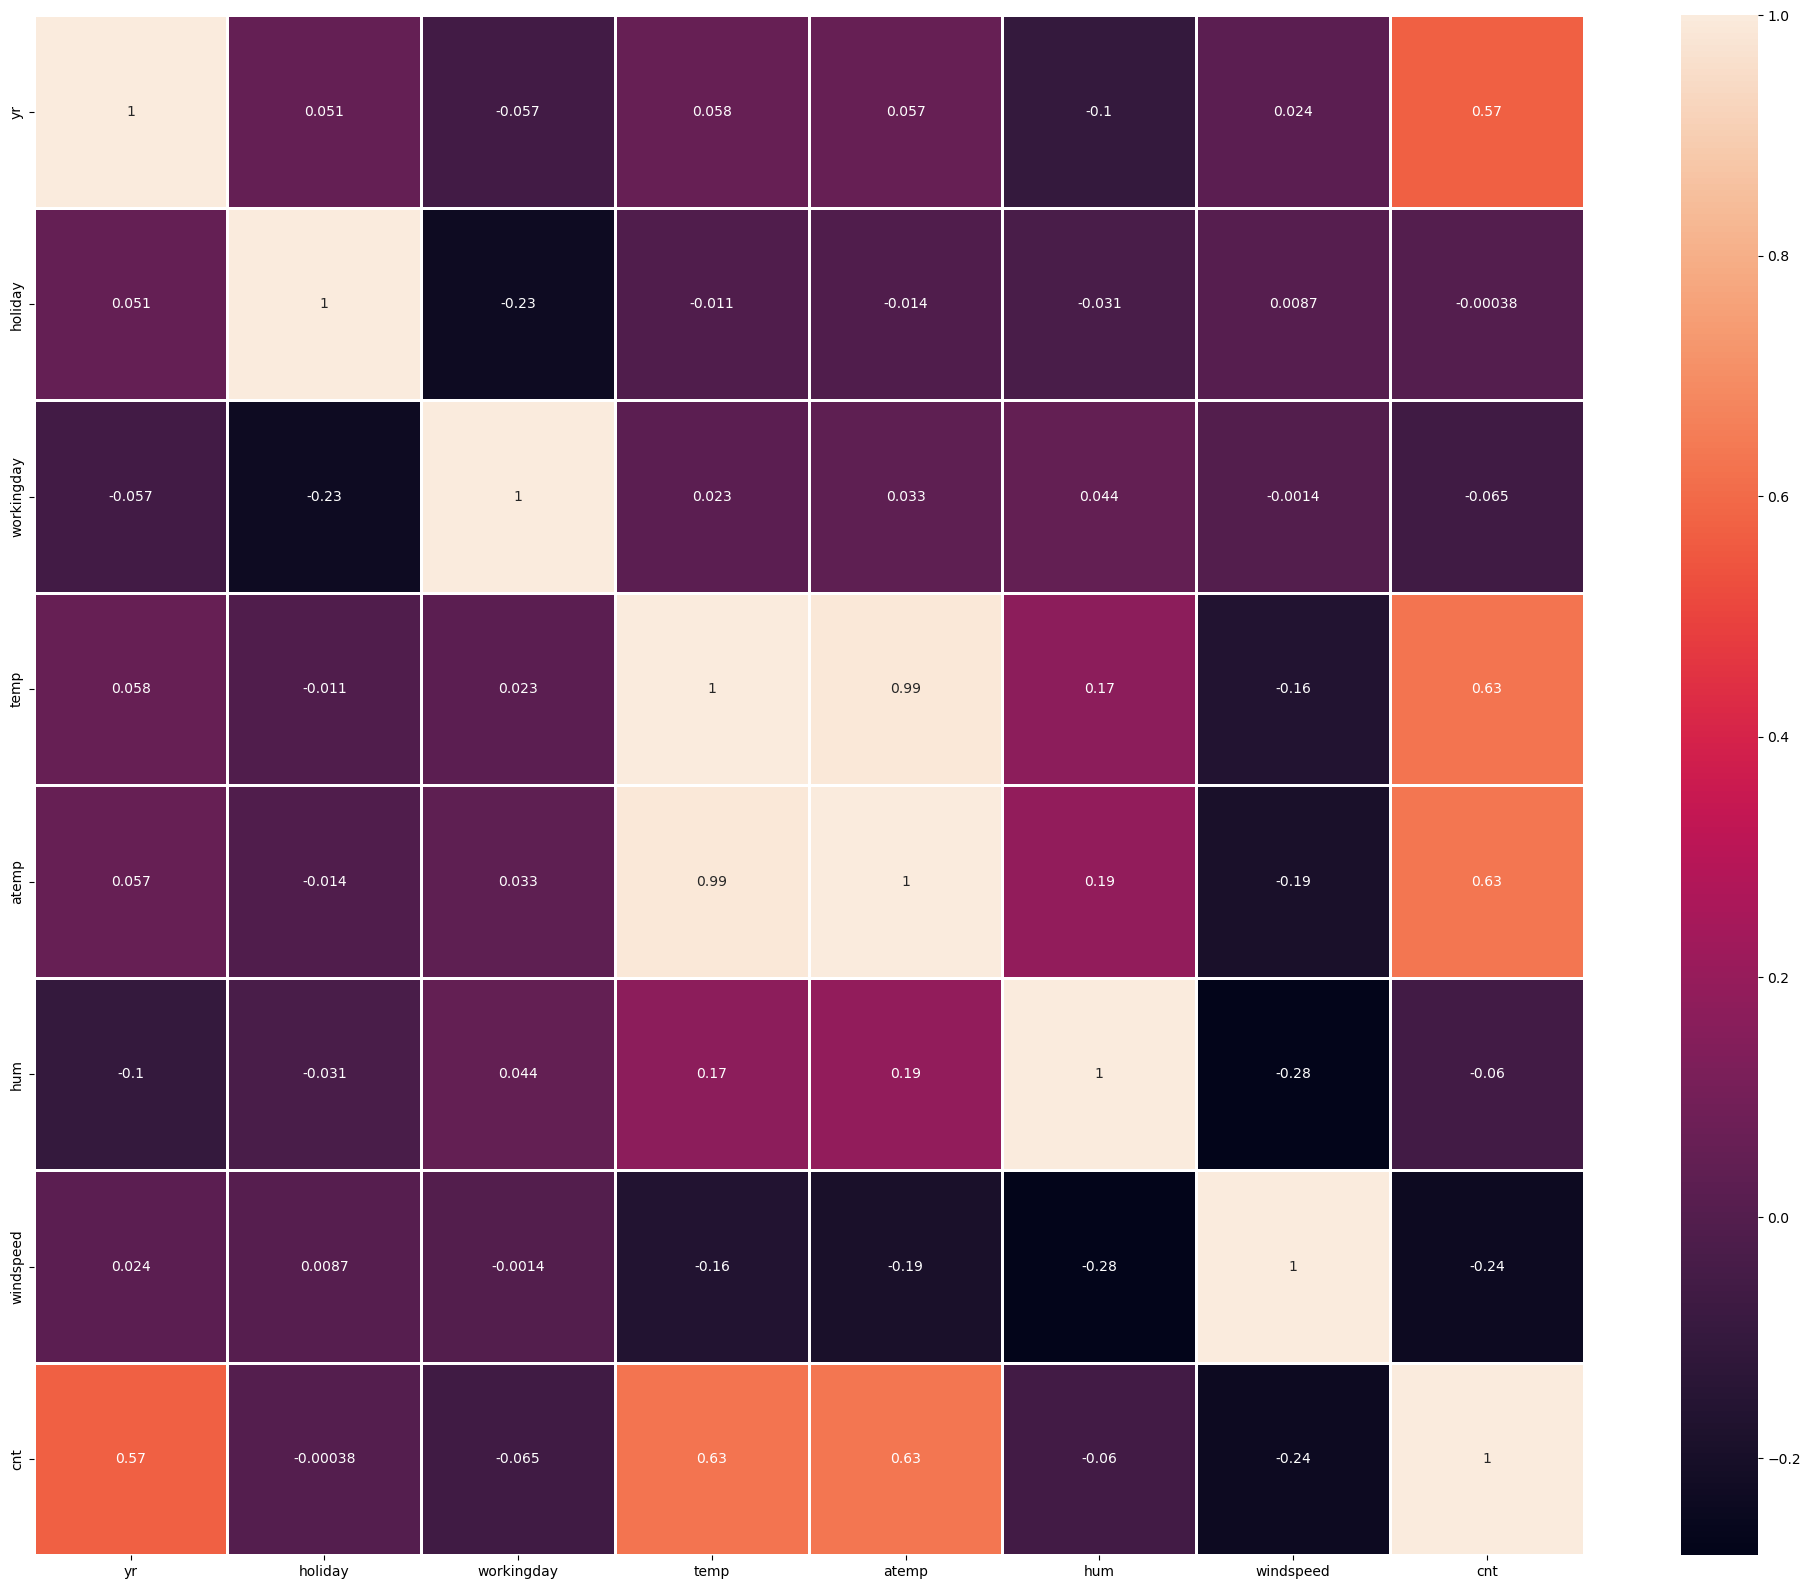

In [47]:
# Select only the numeric columns from the DataFrame
bike = bike_train.select_dtypes(include=['number'])

# Generate the heatmap
plt.figure(figsize=(25, 20))
ax = sns.heatmap(bike.corr(), annot=True, linewidths=1)
plt.show()

# Model Bulding

In [48]:
# Dividing into X_train and y_train
y_train = bike_train.pop('cnt')
X_train = bike_train

In [49]:

X_train_encoded = pd.get_dummies(X_train, drop_first=True)


lm = LinearRegression()


rfe_top10 = RFE(estimator=lm, n_features_to_select=10)             
rfe_top10 = rfe_top10.fit(X_train_encoded, y_train)


rfe_top15 = RFE(estimator=lm, n_features_to_select=15)             
rfe_top15 = rfe_top15.fit(X_train_encoded, y_train)


print(f'top_10 columns -> {X_train_encoded.columns[rfe_top10.support_].to_list()}')
print()
print(f'top_15 columns -> {X_train_encoded.columns[rfe_top15.support_].to_list()}')

top_10 columns -> ['yr', 'temp', 'hum', 'windspeed', 'W2_Summer', 'W4_Winter', 'Light_rainsnow', 'season_W4_Winter', 'mnth_Sep', 'weathersit_Light_rainsnow']

top_15 columns -> ['yr', 'temp', 'atemp', 'hum', 'windspeed', 'W2_Summer', 'W4_Winter', 'Nov', 'Light_rainsnow', 'season_W2_Summer', 'season_W3_Fall', 'season_W4_Winter', 'mnth_Sep', 'weathersit_Light_rainsnow', 'weathersit_Misty']


In [50]:
# Function to calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data


# Model 1

In [51]:
features = ['yr', 'holiday', 'temp', 'hum', 'windspeed']
X_train_top5 = X_train[features] 
X_train_top5 = sm.add_constant(X_train_top5) 
lm = sm.OLS(y_train , X_train_top5).fit() 
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     273.0
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          6.99e-141
Time:                        18:38:36   Log-Likelihood:                 373.71
No. Observations:                 510   AIC:                            -735.4
Df Residuals:                     504   BIC:                            -710.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3412      0.032     10.642      0.0

# Model 2

In [52]:
features = [ 'workingday', 'atemp']
X_train_top8 = X_train[features]
X_train_top8 = sm.add_constant(X_train_top8)
lm = sm.OLS(y_train, X_train_top8).fit()
print(lm.summary())
print('*' * 100)
vif_data = calculate_vif(X_train_top8)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     173.3
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           4.45e-58
Time:                        18:38:39   Log-Likelihood:                 172.35
No. Observations:                 510   AIC:                            -338.7
Df Residuals:                     507   BIC:                            -326.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2003      0.023      8.791      0.0

# Final Model

In [53]:
features = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'workingday', 'windspeed']
X_train_final = X_train[features]
X_train_final = sm.add_constant(X_train_final)
lm = sm.OLS(y_train, X_train_final).fit()
print(lm.summary())
print('*' * 100)
vif_data = calculate_vif(X_train_final)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     198.9
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.39e-140
Time:                        18:38:43   Log-Likelihood:                 378.18
No. Observations:                 510   AIC:                            -740.4
Df Residuals:                     502   BIC:                            -706.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3490      0.033     10.630      0.0

# Residual analysis and validating the assumptions


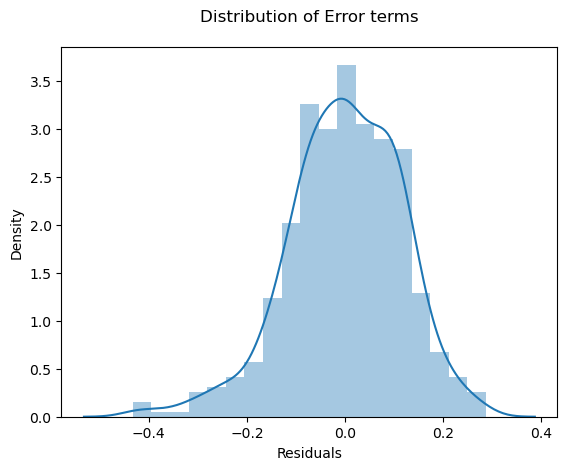

In [54]:
y_train_pred = lm.predict(X_train_final) 
res = y_train - y_train_pred 
sns.distplot(res) 
plt.title('Distribution of Error terms\n') 
plt.xlabel('Residuals')
plt.show() 

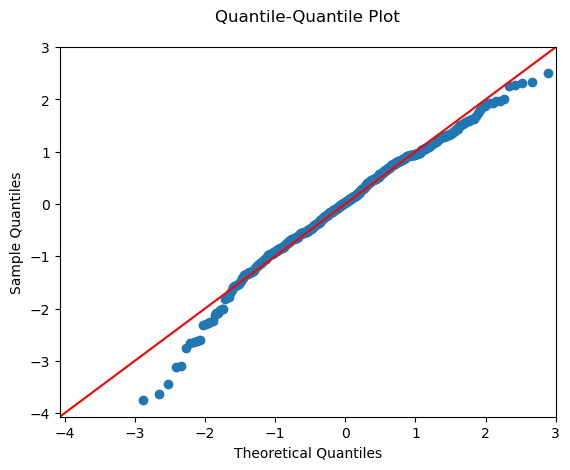

In [55]:
# also plot a Q-Q plot
sm.qqplot(res,line='45',fit=True) 
plt.title('Quantile-Quantile Plot\n')
plt.show()

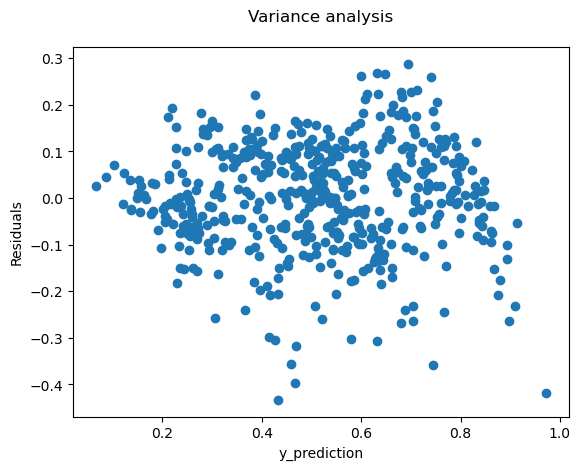

In [56]:
plt.scatter( y_train_pred, res) 
plt.title('Variance analysis\n')
plt.ylabel('Residuals') 
plt.xlabel('y_prediction')
plt.show()

- Error terms are normally distributed with mean approximately zero .
- By observing the Q-Q plot we can clearly see that most of the points are in the line so residuals are normally distributed .
- Error terms have constant variance because the points are randomly scattered ; there is no such pattern .

# Test the model on testing set

In [57]:
bike_test.head()

season  yr mnth  holiday   weekday  workingday weathersit       temp  \
22   W1_Spring   0  Jan        0   Tuesday           1      Clear   3.957390   
468  W2_Summer   1  Apr        0    Sunday           0      Clear  20.295000   
553    W3_Fall   1  Jul        0    Monday           1      Clear  33.722500   
504  W2_Summer   1  May        0    Monday           1      Clear  25.454153   
353  W4_Winter   0  Dec        0  Thursday           1      Misty  15.819153   

         atemp      hum  ...    Oct    Sep  Light_rainsnow  Misty  Monday  \
22    4.941955  43.6522  ...  False  False           False  False   False   
468  24.399800  50.2917  ...  False  False           False  False   False   
553  39.519800  57.3750  ...  False  False           False  False    True   
504  29.198350  53.0417  ...  False  False           False  False    True   
353  19.822700  59.5417  ...  False  False           False   True   False   

     Saturday  Sunday  Thursday  Tuesday  Wednesday  
22      False   False     False     True      False  
468     False    True     False    False      False  
553     False   False     False    False      False  
504     False   False     False    False      False  
353     False   False      True    False      False  

[5 rows x 34 columns]

In [58]:
y_test = bike_test['cnt']
features = ['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']
X_test_sm = bike_test[features]
X_test_sm = sm.add_constant(X_test_sm)
lr_test = sm.OLS(y_test, X_test_sm).fit()
print(lr_test.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     99.02
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           7.68e-59
Time:                        18:39:04   Log-Likelihood:                -1827.3
No. Observations:                 220   AIC:                             3669.
Df Residuals:                     213   BIC:                             3692.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1746.8526    503.336      3.471      0.0

In [59]:
# Recreate X_train_top15 if needed, using the same features as in X_test_sm
X_train_top15 = X_train[['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',]]
X_train_top15 = sm.add_constant(X_train_top15)

lm = sm.OLS(y_train, X_train_top15).fit()

y_test_pred = lm.predict(X_test_sm)

y_train_pred = lm.predict(X_train_top15)  
print(r2_score(y_test, y_test_pred))
print(r2_score(y_train, y_train_pred))


-5.677533292868219
0.7338400961481931


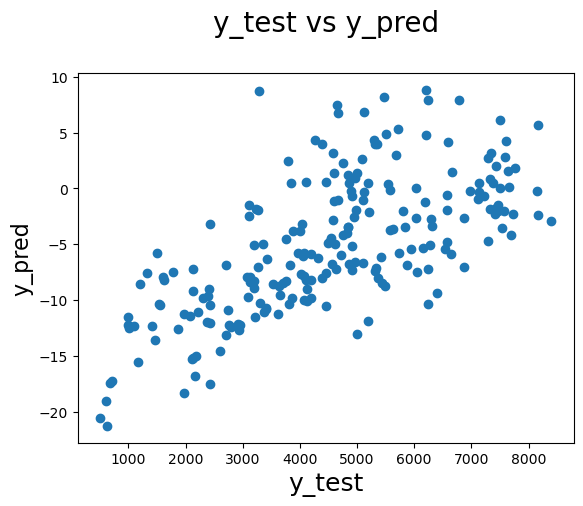

In [60]:
plt.scatter(y_test,y_test_pred) 
plt.title('y_test vs y_pred\n', fontsize=20)         
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 
plt.show()

# Interpreting coefficients

### so our final linear equation is :
* count of rental bikes = -0.29 + const=1746.8526 + yr=1975.0580 + workingday =194.9864 + temp =-148.8460- atemp =278.1890+ hum =       -23.5993 - 
windspeed= -34.832
* Temperature , year , September month , winter season are positively impacting rental bike counts
* july month , mist weather , spring season , holiday , light snow weather are negatively impacting rental bike counts4

* top 2 features are
   * Tempreture   * 
year

* When the weather condition is light Snow/Rain the count of rental bike is decrease by 1.33 standard deviation .
* A change of 1 standard deviation in Temperature is associated with a change of 0.47 standard deviations of count of rental bikes .
* In each year the count of rental bikes is increase by 1.04 standard daviation .